In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from pyforest import *
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [1]:
df = pd.read_csv('C:/Users/abhishek/Downloads/Bank_Personal_Loan_Modelling-1.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [2]:
df.rename(columns={'Personal Loan':'Personal_Loan',
                          'Securities Account':'Securities_Account',
                          'CD Account':'CD_Account'}, 
                 inplace=True)
 

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.drop('ID',axis=1,inplace=True)  #removing unnecessary columns

In [5]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.rename(columns={'ZIP Code':'ZIP_Code'}, 
                 inplace=True)
 

In [7]:
df.drop('ZIP_Code',axis=1,inplace=True)  #removing unnecessary columns

In [8]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [16]:
df.info()  #no categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 468.8 KB


In [24]:
df.isnull().sum()  #no null values!

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

# UNIVARIATE ANALYSIS

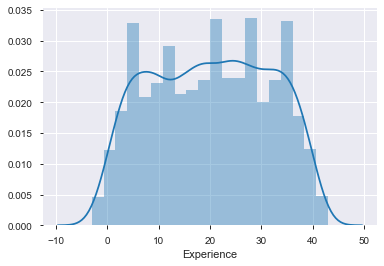

In [17]:
sns.distplot(df['Experience'])  #not normal - has no particular trend

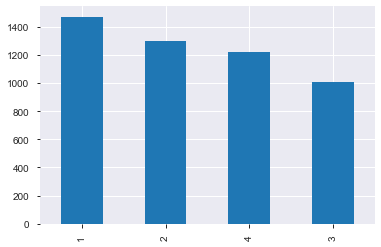

In [15]:
df.Family.value_counts().plot(kind='bar')   #max people are single then couple , then family of 3 and 4 

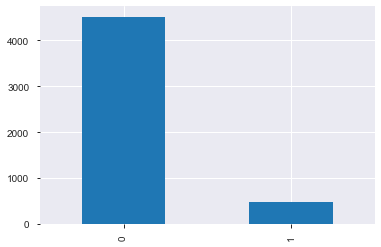

In [10]:
df.Personal_Loan.value_counts().plot(kind='bar')  #as we see 4520 people took loan and 480 people did not take loan

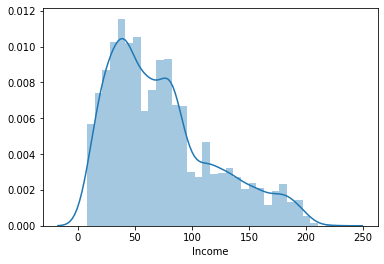

In [100]:
sns.distplot(df.Income)  #income distribution is not normal
#sns.distplot(df.Income.dropna(),color='red')  if null values would have been there!
#

In [11]:
#lets check missing values:p-
df.isnull().sum()  #no missing values and no need of dummies as all values are numerical!

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

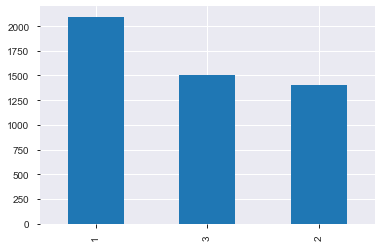

In [12]:
df.Education.value_counts().plot(kind='bar')#education is highest of category 1

In [23]:
df.Securities_Account.value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

In [119]:
df.CD_Account.value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

In [120]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [121]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

# we will do bivariate analysis mostly now for this problem and analyse the loan takers versus non takers

Bivariate Analysis
Num vs Num - scatter plot

cat vs numerical - Box plot(only for mean median mode)/countplot/bar plot!

cat vs cat - frequancy table or countplot ! (syntax - sns.countplot(x="Risk",hue="Results",data=df2)

In [18]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

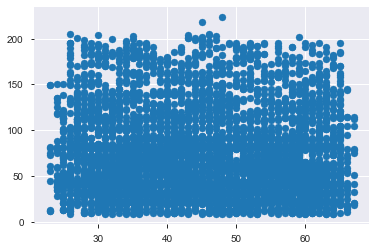

In [25]:
plt.scatter(df.Age,df.Income)  ## no clear trend of age and income!

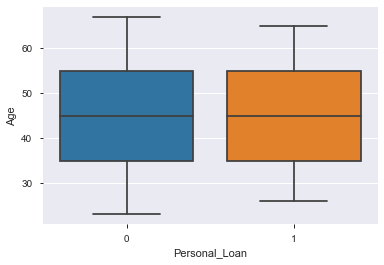

In [19]:
sns.boxplot(x='Personal_Loan',y='Age',data=df)  #people from age group of 35-55 have taken loan mostly

In [20]:
df.groupby('Personal_Loan')['Age'].describe() 
#so as we see age of people who hasnt  taken loan and who has is same :people in age group 35-55 have take loan

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4520.0,45.367257,11.450427,23.0,35.0,45.0,55.0,67.0
1,480.0,45.066667,11.590964,26.0,35.0,45.0,55.0,65.0


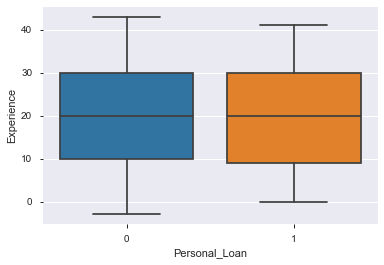

In [21]:
sns.boxplot(x='Personal_Loan',y='Experience',data=df)  #10-30 year olds have taken loan mostly

In [108]:
df.groupby('Personal_Loan')['Experience'].describe()  #people within 9-30 years of exp has taken loan majorly

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4520.0,20.132301,11.456672,-3.0,10.0,20.0,30.0,43.0
1,480.0,19.843750,11.582443,0.0,9.0,20.0,30.0,41.0


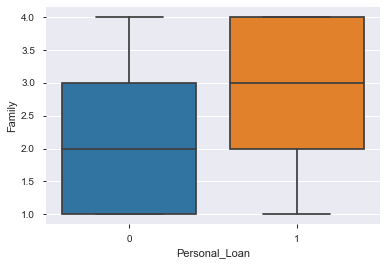

In [22]:
sns.boxplot(x='Personal_Loan',y='Family',data=df)  #2-4 member families have only taken loan -- singles have not taken loan

In [111]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

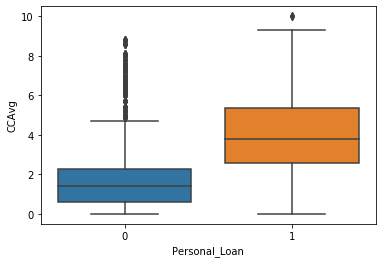

In [112]:
sns.boxplot(x='Personal_Loan',y='CCAvg',data=df) #people who have taken loan have cc avg from 2-5 mostly

In [113]:
df.groupby('Personal_Loan')['CCAvg'].describe()   #ccavg - 2.6-5.3 have taken loan majorly

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4520.0,1.729009,1.567647,0.0,0.6,1.4,2.3000,8.8
1,480.0,3.905354,2.097681,0.0,2.6,3.8,5.3475,10.0


In [114]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

In [115]:
pd.crosstab(df['Personal_Loan'],df['Education'])  #we see that 3 people education have taken loans mostly

Education,1,2,3
Personal_Loan,,,
0,2003,1221,1296
1,93,182,205


In [117]:
pd.crosstab(df['Personal_Loan'],df['Mortgage'])

Mortgage,0,75,76,77,78,79,80,81,82,83,...,577,581,582,587,589,590,601,612,617,635
Personal_Loan,,,,,,,,,,,,,,,,,,,,,
0,3150,7,11,4,15,11,7,12,9,16,...,0,0,0,0,0,0,1,0,0,1
1,312,1,1,0,0,0,0,1,1,0,...,1,1,1,1,1,1,0,1,1,0


In [122]:

pd.crosstab(df['Personal_Loan'],df['Online'])

Online,0,1
Personal_Loan,,
0,1827,2693
1,189,291


In [123]:
pd.crosstab(df['Personal_Loan'],df['Securities_Account'])


Securities_Account,0,1
Personal_Loan,,
0,4058,462
1,420,60


In [124]:
pd.crosstab(df['Personal_Loan'],df['CD_Account'])


CD_Account,0,1
Personal_Loan,,
0,4358,162
1,340,140


In [125]:
pd.crosstab(df['Personal_Loan'],df['CreditCard'])  #people who have lesser credit cards have taken personal loan more

CreditCard,0,1
Personal_Loan,,
0,3193,1327
1,337,143


# feature selection using statistics?:-

In [26]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

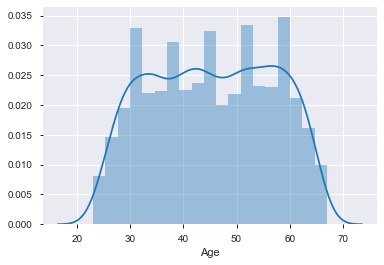

In [27]:
#does age have any effect on Personal loan? --
sns.distplot(df['Age'])  #as we see that age is not normal we will go for non parametric-- i.emannwhitmey

In [29]:
from scipy import stats
import numpy       as np
import pandas      as pd
import scipy.stats as st
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt

mi=df[df['Personal_Loan']==0]['Age']
fi=df[df['Personal_Loan']==1]['Age']
stats.mannwhitneyu(mi,fi)

MannwhitneyuResult(statistic=1067475.0, pvalue=0.282198228126577)

In [ ]:
#as p value is greater than 0.05 we accpet null hypo , or age has no effect on personal loan

In [30]:
#does income have an effect on personal loan?
mi=df[df['Personal_Loan']==0]['Income']
fi=df[df['Personal_Loan']==1]['Income']
stats.mannwhitneyu(mi,fi)  #yes income has an effect on personal loan!

MannwhitneyuResult(statistic=169085.0, pvalue=5.1758768403207515e-204)

In [31]:
#does family members have an effect on personal loan?
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [32]:
table=pd.crosstab(index=df['Personal_Loan'],columns=df['Family'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  #yes family effects loan!

(29.676116414854746,
 1.6144121228248757e-06,
 3,
 array([[1330.688, 1171.584,  913.04 , 1104.688],
        [ 141.312,  124.416,   96.96 ,  117.312]]))

In [33]:
#does experience effect loan?
mi=df[df['Personal_Loan']==0]['Experience']
fi=df[df['Personal_Loan']==1]['Experience']
stats.mannwhitneyu(mi,fi)  #no  no effect on personal loan!  

MannwhitneyuResult(statistic=1067998.5, pvalue=0.28811225857103073)

In [34]:
df.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0


In [35]:
#personal-loan vs mortgage
table=pd.crosstab(index=df['Personal_Loan'],columns=df['Mortgage'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  #yes mortgage effects loan!

(781.3739059170855,
 1.1029336146853801e-35,
 346,
 array([[3.129648e+03, 7.232000e+00, 1.084800e+01, 3.616000e+00,
         1.356000e+01, 9.944000e+00, 6.328000e+00, 1.175200e+01,
         9.040000e+00, 1.446400e+01, 9.944000e+00, 6.328000e+00,
         9.944000e+00, 1.265600e+01, 8.136000e+00, 1.446400e+01,
         1.356000e+01, 1.446400e+01, 3.616000e+00, 3.616000e+00,
         1.265600e+01, 9.944000e+00, 6.328000e+00, 1.084800e+01,
         1.536800e+01, 5.424000e+00, 1.084800e+01, 1.265600e+01,
         1.356000e+01, 1.446400e+01, 1.265600e+01, 7.232000e+00,
         1.175200e+01, 5.424000e+00, 9.040000e+00, 1.175200e+01,
         7.232000e+00, 9.944000e+00, 1.175200e+01, 9.040000e+00,
         7.232000e+00, 9.944000e+00, 1.175200e+01, 9.040000e+00,
         1.265600e+01, 1.446400e+01, 1.084800e+01, 1.084800e+01,
         7.232000e+00, 8.136000e+00, 6.328000e+00, 5.424000e+00,
         6.328000e+00, 6.328000e+00, 8.136000e+00, 6.328000e+00,
         5.424000e+00, 1.265600e+01, 7.

In [43]:
#personal-loan vs education
table=pd.crosstab(index=df['Personal_Loan'],columns=df['Education'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  #yes effect on loan!

(111.2398718738913,
 6.991473868665428e-25,
 2,
 array([[1894.784, 1268.312, 1356.904],
        [ 201.216,  134.688,  144.096]]))

In [36]:
#personal-loan vs Securities_Account
table=pd.crosstab(index=df['Personal_Loan'],columns=df['Securities_Account'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  #no effect on loan!

(2.172310545186504, 0.14051497326319357, 1, array([[4048.112,  471.888],
        [ 429.888,   50.112]]))

In [37]:
#personal-loan vs CD_Account
table=pd.crosstab(index=df['Personal_Loan'],columns=df['CD_Account'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  #yes effects loan!

(495.90424218782334, 7.398297503329848e-110, 1, array([[4246.992,  273.008],
        [ 451.008,   28.992]]))

In [38]:
#personal-loan vs Online
table=pd.crosstab(index=df['Personal_Loan'],columns=df['Online'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  #does not effect loan!

(0.1560067212052492, 0.6928599643141485, 1, array([[1822.464, 2697.536],
        [ 193.536,  286.464]]))

In [40]:
#personal-loan vs Creditcard
table=pd.crosstab(index=df['Personal_Loan'],columns=df['CreditCard'])
from scipy.stats import chi2_contingency
chi2_contingency(table)  #does not effect loan!

(0.021144453920855056, 0.8843861223314504, 1, array([[3191.12, 1328.88],
        [ 338.88,  141.12]]))

In [ ]:
two way annova code---------------------------------------
import scipy.stats as st
import statsmodels.api as sms
from statsmodels.formula.api import ols
#lets fit ols:
model=ols("Rating~Delivery_Time",data=df).fit() # rating and delivery time are my two targets!!
##two way annova:
sms.stats.anova_lm(model)

sample :----
#as we see p value is less than alpha we reject null hypothesis --> hence rating does have an effect on delivery time!

In [45]:
#Droppping the variables that do no effect target!
df.drop('Age',axis=1,inplace=True)
df.drop('Experience',axis=1,inplace=True)
df.drop('Securities_Account',axis=1,inplace=True)
df.drop('Online',axis=1,inplace=True)
df.drop('CreditCard',axis=1,inplace=True)

In [46]:
df.head()

,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,CD_Account
0,49,4,1.6,1,0,0,0
1,34,3,1.5,1,0,0,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0


In [ ]:
#outlier removal

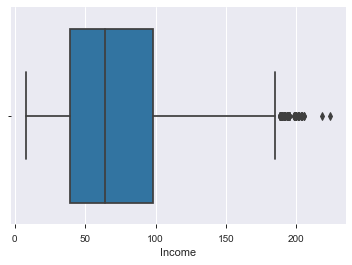

In [47]:
sns.boxplot(df['Income'])

In [48]:
#lets remove outliers from income!
df['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [49]:
q1=39-1.5*(98-39)
q3=98+1.5*(98-39)
print(q1)
print(q3)

-49.5
186.5


In [50]:
df=df[df['Income']<186.5]  #removing outliers

In [51]:
df.shape

(4904, 7)

# dummies - no need as values are numerical!!

# train test split

In [54]:
x=df.drop('Personal_Loan',axis=1)
y=df['Personal_Loan']

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=123)

# scaling

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [56]:
#scaling train and test!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  #now we want to scale the values of train data

sc.fit_transform(xtrain)
pd.DataFrame(sc.fit_transform(xtrain))
xtrain_scaled=pd.DataFrame(sc.fit_transform(xtrain),columns = xtrain.columns)  #scaled data


sc.transform(xtest) 
xtest_scaled = pd.DataFrame(sc.transform(xtest),columns = xtest.columns)


# modelling

In [136]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score
from sklearn.metrics import matthews_corrcoef


# dtree:-

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
pred_dtree = dtree.fit(xtrain_scaled,ytrain).predict(xtest_scaled)


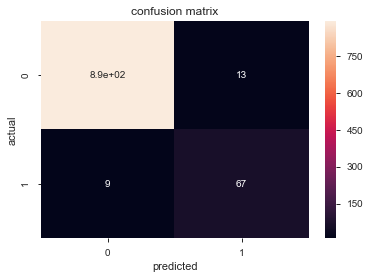

In [59]:
sns.heatmap(confusion_matrix(ytest,pred_dtree),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [60]:
accuracy_score(ytest,pred_dtree)

0.9775739041794088

In [61]:
cohen_kappa_score(ytest,pred_dtree)

0.8468014424032482

In [137]:
print("The MCC is",matthews_corrcoef(ytest,pred_dtree))


The MCC is 0.8471301338259232


In [106]:
print(classification_report(ytest,pred_dtree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       905
           1       0.84      0.88      0.86        76

    accuracy                           0.98       981
   macro avg       0.91      0.93      0.92       981
weighted avg       0.98      0.98      0.98       981



In [ ]:
#pruning decision tree-grid search cv

In [86]:
params={"criterion":['gini',"entropy"],"max_depth":[2,3,4,5],
       "max_features":["auto","sqrt","log2"],
        "splitter":["best","random"]}    #ISLR by springer

In [93]:
# Prunning Decision Tree
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dtree,param_grid=params,cv=5)           # cv:cross validation: shows the best value 
                                                                    #which is random forest
grid.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                       

In [94]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [91]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='auto',splitter='best')

In [98]:
pred_dtree_pruned = dtree.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [102]:
accuracy_score(ytest,pred_dtree_pruned)

0.9714576962283384

In [101]:
cohen_kappa_score(ytest,pred_dtree_pruned)

0.8158561602509955

In [138]:
print("The MCC is",matthews_corrcoef(ytest,pred_dtree_pruned))


The MCC is 0.819336406705541


# random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [63]:
pred_r = rf.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


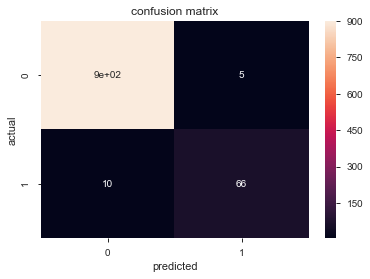

In [65]:
sns.heatmap(confusion_matrix(ytest,pred_r),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [66]:
accuracy_score(ytest,pred_r)

0.9847094801223242

In [67]:
cohen_kappa_score(ytest,pred_r)

0.8897050556534123

In [139]:
print("The MCC is",matthews_corrcoef(ytest,pred_r))


The MCC is 0.8903069569837042


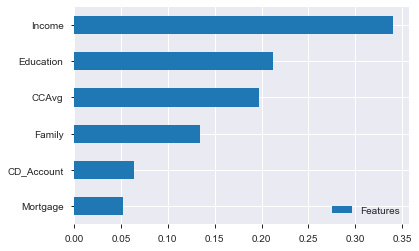

In [73]:
#feature selection using random forest!! - matches totally with our assumptions of stats!
pd.DataFrame(rf.feature_importances_,index=xtrain.columns,
            columns=["Features"]).sort_values(by="Features").plot(kind="barh")

# knn model

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [69]:
pred_knn = knn.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

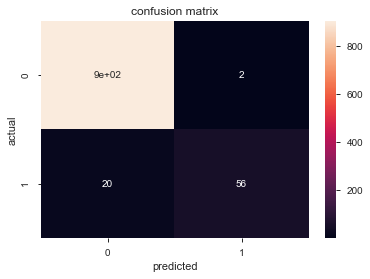

In [70]:
sns.heatmap(confusion_matrix(ytest,pred_knn),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [71]:
accuracy_score(ytest,pred_knn)

0.9775739041794088

In [72]:
cohen_kappa_score(ytest,pred_knn)

0.8240186565338639

In [140]:
print("The MCC is",matthews_corrcoef(ytest,pred_knn))


The MCC is 0.8326954187286661


In [103]:
#increasing the number of neighbours of knn!!
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=20) #increasing the number of neighbors, say , 20 ........
pred_knn_neighbours=knn.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [104]:
accuracy_score(ytest,pred_knn_neighbours)

0.963302752293578

In [105]:
cohen_kappa_score(ytest,pred_knn_neighbours)

0.6955674706480699

In [141]:
print("The MCC is",matthews_corrcoef(ytest,pred_knn_neighbours))


The MCC is 0.7130152052469895


# logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
pred_lr=lg.fit(xtrain_scaled,ytrain).predict(xtest_scaled)
accuracy_score(ytest,pred_lr) #accuracy is 69%

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9561671763506626

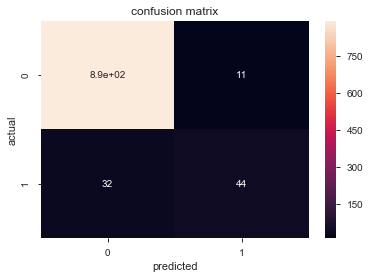

In [76]:
sns.heatmap(confusion_matrix(ytest,pred_lr),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [77]:
accuracy_score(ytest,pred_lr)

0.9561671763506626

In [78]:
cohen_kappa_score(ytest,pred_lr)

0.6489167797188538

In [142]:
print("The MCC is",matthews_corrcoef(ytest,pred_lr))


The MCC is 0.6586708965936636


# NAIVE BAYES 

In [81]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
pred_gnb=gnb.fit(xtrain_scaled,ytrain).predict(xtest_scaled) 
  


In [82]:
accuracy_score(ytest,pred_gnb)

0.9011213047910296

In [143]:
print("The MCC is",matthews_corrcoef(ytest,pred_gnb))


The MCC is 0.41072790971760026


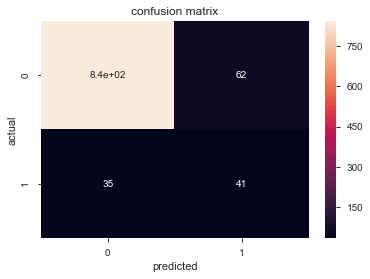

In [84]:
sns.heatmap(confusion_matrix(ytest,pred_gnb),annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [83]:
cohen_kappa_score(ytest,pred_gnb)

0.40505680148552925

# when model is imbalanced or cohen kuppa is less than 0.5 we can do SMOTE

# apply smote : synthetic minority over sampling technique ! to remove imbalance : do over sampling : removes imbalance of data


In [107]:
from imblearn.over_sampling import SMOTE
s=SMOTE(ratio="minority") #focus on minority ratio 
xtrain_smote,ytrain_smote=s.fit_sample(xtrain_scaled,ytrain)  #smote applied on training set data
xtest_smote,ytest_smote=s.fit_sample(xtest_scaled,ytest)   #smote applied on test set data

In [109]:
print(xtrain.shape) #or ytrain shape=(3923,)
print(xtrain_smote.shape)

(3923, 6)
(7122, 6)


In [114]:
print(xtest.shape)   #or ytest shape=(981,)
print(xtest_smote.shape)

(981, 6)
(1810, 6)


In [116]:
print("the count of 1s is",sum(ytrain[ytrain==1]))   #checking y train values==1 before applying smote
print("the count of 0s is",sum(ytrain[ytrain==0]))  #checking y train values==0  before applying smote
print("the count of 1s is",sum(ytrain_smote==1))   #checking y train values==1   after applying smote
print("the count of 1s is",sum(ytrain_smote==0))   #checking y train values==0  after applying smote
#now we see that the ytrain values are balanced!

the count of 1s is 362
the count of 0s is 0
the count of 1s is 3561
the count of 1s is 3561


In [124]:
pred_smote = rf.fit(xtrain_smote,ytrain_smote).predict(xtest_smote)   #applying random forest
#after applying smote on reset values of xtrain,ytrain and predicitng reset xtest values!
#pred-these are my predicted values whether loan will be given or not! of 152 people
pred_smote

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [119]:
accuracy_score(ytest_smote,pred_smote)   #accuracy incraesed after applying smote!

0.9773480662983426

In [121]:
cohen_kappa_score(ytest_smote,pred_smote)   
#accuracy of kohen cuppa incraesed after applying smote! previous accuracy was 88 of kohen cuppa after applying random forest.

0.9546961325966851

In [144]:
print("The MCC is",matthews_corrcoef(ytest_smote,pred_smote))


The MCC is 0.9409958030926627


# Ensemble techniques-collection of machine learning algorithms- used only for high variance and low bias i.e overfit scenario-------------
# Except XGBoost all classifiers have corresonding Regressors

***********************************************************************************************

# 1.Decision tree using ensembles:-

In [126]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')  #criterion defined as entropy
pred_dtree_class=dtree.fit(xtrain_scaled,ytrain).predict(xtest_scaled)
accuracy_score(ytest,pred_dtree_class)
#much higher accuracy than simple decision tree

0.9806320081549439

In [129]:
cohen_kappa_score(ytest,pred_dtree_class)   

0.8684661797395998

In [145]:
print("The MCC is",matthews_corrcoef(ytest,pred_dtree_class))


The MCC is 0.868986919888938


# 2.bagging

In [127]:
from sklearn.ensemble import BaggingClassifier
bagg=BaggingClassifier()
pred_bagg=bagg.fit(xtrain_scaled,ytrain).predict(xtest_scaled)
accuracy_score(ytest,pred_bagg)

0.9847094801223242

In [130]:
cohen_kappa_score(ytest,pred_bagg)   

0.8936692945248539

In [146]:
print("The MCC is",matthews_corrcoef(ytest,pred_bagg))


The MCC is 0.8936917487504146


# 3.boosting

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()  #needs tuning!
pred_gbm=gbm.fit(xtrain_scaled,ytrain).predict(xtest_scaled)
accuracy_score(ytest,pred_gbm)  #high accuracy

0.9836901121304791

In [131]:
cohen_kappa_score(ytest,pred_gbm)   

0.8845050109637828

In [147]:
print("The MCC is",matthews_corrcoef(ytest,pred_gbm))


The MCC is 0.8845972011105225


# 4.adaboost

In [132]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
pred_ada=ada.fit(xtrain_scaled,ytrain).predict(xtest_scaled)
accuracy_score(ytest,pred_ada)  

0.9643221202854231

In [133]:
cohen_kappa_score(ytest,pred_ada)   

0.7458041207347138

In [148]:
print("The MCC is",matthews_corrcoef(ytest,pred_ada))


The MCC is 0.7459812102615756


# 5.voting classifier! ensemble method with estimators to be defined by user

In [134]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("tree",dtree),("random",rf),("gbm",gbm),("knn",knn),("logistic",lg),("bagging",bagg),("adaboost",ada)])  # we can take as many estimators
pred_vc=vc.fit(xtrain_scaled,ytrain).predict(xtest_scaled)
accuracy_score(ytest,pred_vc)

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9867482161060143

In [135]:
cohen_kappa_score(ytest,pred_vc)   

0.9019746500741743

In [149]:
print("The MCC is",matthews_corrcoef(ytest,pred_vc))


The MCC is 0.9040588660982118


In [150]:
accuracy_score(ytest,pred_vc)   

0.9867482161060143